# Benchmark Navigation Ground Metrics


In [5]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.neighbors import KDTree
import networkx as nx

### Load path and map

In [83]:
#load path as numpy array .npy
sample=198
path=numpy.load('paths_for_UnetThinMaps/path_map'+str(sample)+'.npy')
img_map=image.imread('64x64_validation250_v2/map'+str(sample)+'.png');

In [84]:
print('column,row\n',path,path.shape)

column,row
 [[42 10]
 [42  7]
 [48 10]
 [48 14]
 [48 18]
 [48 22]
 [48 26]
 [48 30]
 [48 34]
 [48 38]
 [48 42]
 [48 46]
 [48 50]
 [48 53]
 [46 55]
 [43 55]
 [42 61]] (17, 2)


<class 'numpy.ndarray'> (64, 64) [row,column]= ( 33 61 ): 1.0 
1.0: white(occuped), 0.0: black(free)


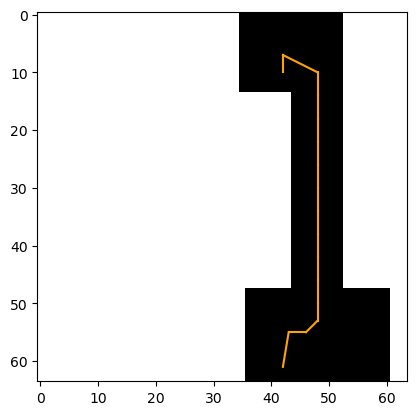

In [85]:
row=numpy.random.randint(64)#row
column=numpy.random.randint(64)#column
print(type(img_map),img_map.shape,'[row,column]=','(',row,column,'):',img_map[row,column],'\n1.0: white(occuped), 0.0: black(free)')
plt.imshow(img_map,cmap='gray')
p=0
while(p+1<len(path)):
    plt.plot((path[p][0],path[p+1][0]),(path[p][1],path[p+1][1]), color='orange')
    p+=1


plt.show()

### 1) Distance to closet obstacle (DCO)

In [86]:
def occupedSpace(img_mpa):
    '''Return an array of occuped pixels'''
    r=0
    W_o=[] #work space occuped
    for row in img_map:
        c=0
        for column in row:
#             print('[r,c]:','[',r,c,']',column)
            if column==1.0:
                W_o.append((r,c))
            c+=1
        r+=1
    W_o=numpy.array(W_o)
    return W_o

In [87]:
workSpace_o=occupedSpace(img_map)
print(type(workSpace_o),workSpace_o.shape,workSpace_o[0])

<class 'numpy.ndarray'> (3138, 2) [0 0]


In [88]:
def distanceToCloseObstacle(path,WSo,img_map):
    '''Implement distance to closet obstacle metric\nfound the nearest occupied space for i-point
    needs, path, map and occuped space
'''
    
    m_tree=KDTree(numpy.array(WSo))#Default='minkowski with p=2 that is a euclidean metric
    g = nx.Graph()
    
    sum_nearestPoint=0
    k=1
    for mil in path:
        mil_array = numpy.array(mil)
        plt.scatter(mil[0],mil[1],marker='.',color='blue')
        distances, indexes = m_tree.query([[mil[1],mil[0]]], k) # find the nearest k milestones
        plt.scatter(WSo[indexes[0][0]][1],WSo[indexes[0][0]][0],marker='.',color='red')
#         print(distances)
        sum_nearestPoint=sum_nearestPoint+distances
    
    plt.imshow(img_map,cmap='gray')

#     print('sum_distances',sum_nearestPoint)   
    dco=sum_nearestPoint/len(path)
    print('dco: ',dco)
    
    return dco
    

dco:  [[5.77560031]]


array([[5.77560031]])

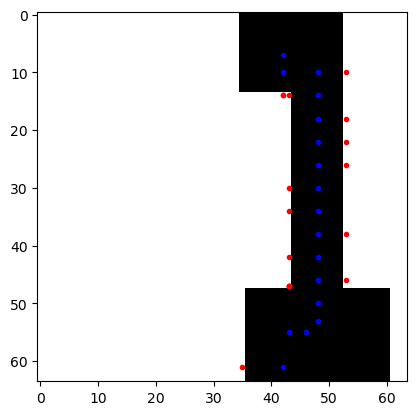

In [89]:
distanceToCloseObstacle(path,workSpace_o,img_map)

### 2) Average visibility

In [90]:
def metric(p1,p2):
    '''metric using minkowski with p=2 that is a euclidean metric\n
    Input: point 1 and point 2\n
    Output: metric'''
    metric=numpy.sqrt(numpy.power(p2[0]-p1[0],2)+numpy.power(p2[1]-p1[1],2))
    return metric

In [91]:

def average_visibility(path,img_map):
    
    scan_rays=8
    visibility=numpy.zeros((len(path),scan_rays))
    visibility_index=[]
    path_index=[]
    item=0
    average_path=[]
    
    for mil in path:
        
        visibility_index=[]
        row=mil[1]
        column=mil[0]
#         print(mil,type(mil),row,column)
        p1=(row,column)
        
        #1
        counter=0
        while counter+column<=63:
            p2=(row,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1  
        v1=metric(p1,p2)
        visibility_index.append(p2)
#         print('1:','[',p2,']',img_map[p2],v1)        
        
        #2
        counter=0
        while counter+column<=63 and row-counter>=0:
            p2=(row-counter,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v2=metric(p1,p2)
        visibility_index.append(p2)
#         print('2:','[',p2,']',img_map[p2],v2)
        
        #3
        counter=0
        while row-counter>=0:
            p2=(row-counter,column)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v3=metric(p1,p2)
        visibility_index.append(p2)
#         print('3:','[',p2,']',img_map[p2],v3)

        #4
        counter=0
        while column-counter>=0 and row-counter>=0:
            p2=(row-counter,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v4=metric(p1,p2)
        visibility_index.append(p2)
#         print('4:','[',p2,']',img_map[p2],v4)

        #5
        counter=0
        while column-counter>=0:
            p2=(row,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1  
        v5=metric(p1,p2)
        visibility_index.append(p2)
#         print('5:','[',p2,']',img_map[p2],v5)
        
        #6
        counter=0
        while column-counter>=0 and row+counter<=63:
            p2=(row+counter,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v6=metric(p1,p2)
        visibility_index.append(p2)
#         print('6:','[',p2,']',img_map[p2],v6)
        
        #7
        counter=0
        while row+counter<=63:
            p2=(row+counter,column)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v7=metric(p1,p2)
        visibility_index.append(p2)
#         print('7:','[',p2,']',img_map[p2],v7)

        #8
        counter=0
        while column+counter<=63 and row+counter<=63:
            p2=(row+counter,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v8=metric(p1,p2)
        visibility_index.append(p2)
#         print('8:','[',p2,']',img_map[p2],v8)
#         print('point:',row,column,'[1]:',v1,'[2]:',v2,'[3]:',v3,'[4]:',v5,'[5]:',v6,'[6]:',v7,'[7]:',v7,'[8]:',v8)
        
        visibility[item,0]=v1
        visibility[item,1]=v2
        visibility[item,2]=v3
        visibility[item,3]=v4
        visibility[item,4]=v5
        visibility[item,5]=v6
        visibility[item,6]=v7
        visibility[item,7]=v8
        average=visibility[item].mean()
#         print('average point:',average)
        item+=1
        path_index.append(visibility_index)
        average_path.append(average)
        
    return average_path,path_index

In [92]:
average,index=average_visibility(path,img_map);
print('average visibility point in path:',numpy.array(average).mean())

average visibility point in path: 13.31456528954958


In [93]:
print(path,len(path))

[[42 10]
 [42  7]
 [48 10]
 [48 14]
 [48 18]
 [48 22]
 [48 26]
 [48 30]
 [48 34]
 [48 38]
 [48 42]
 [48 46]
 [48 50]
 [48 53]
 [46 55]
 [43 55]
 [42 61]] 17


In [94]:
rng = numpy.random.default_rng()
index = numpy.int_(rng.integers(0, len(path)))
print(index)
average,path_index=average_visibility(path[index:index+1],img_map)
print(numpy.array(average).mean())
print("path index",path_index)

12
17.48896103067893
path index [[(np.int32(50), np.int32(61)), (np.int32(45), np.int32(53)), (np.int32(0), np.int32(48)), (np.int32(45), np.int32(43)), (np.int32(50), np.int32(35)), (np.int32(63), np.int32(35)), (np.int32(63), np.int32(48)), (np.int32(63), np.int32(61))]]


48 50 61 50
48 50 53 45
48 50 48 0
48 50 43 45
48 50 35 50
48 50 35 63
48 50 48 63
48 50 61 63


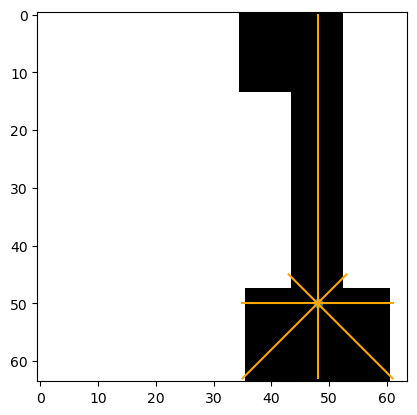

In [95]:
origin=path[index]

plt.imshow(img_map,cmap='gray')
plt.scatter(origin[0],origin[1])

x1=origin[0]
y1=origin[1]
for p in path_index:
    for i in p:
        x2=i[1]
        y2=i[0]
        print(x1,y1,x2,y2)
        plt.plot((x1,x2),(y1,y2),color='orange')
        
plt.show()

### 3) Dispersion

In [96]:
#THIS NOT MAKE CERTAIN THE PATH LENGHT (160822)
#because the poin to point line can cross a obstacle ¿or not?

def lenght_path(path):
    '''return the lenght of the path'''
    distance=0
    p_0=path[0]
    for p in path:
        distance=distance+metric(p_0,p)
        p_0=p
    return distance

In [97]:
lenght_path(path)

np.float64(64.61939358754378)

In [98]:
def dispersion(path, img_map):
    '''dispersion metric \n  is calculated for each point in the path and averaged
over the length of the path'''
    beams=16
    beams_array=numpy.arange(0,2*numpy.pi,(2*numpy.pi)/beams)
    max_lenght=6 #(pixels?) 12 value in paper
#     print(beams_array)
    
    list_dispersion=[]
    list_path_beams=[]
    
    for p in path:
#         print('point:','[',p,']')
        dispersion=0
        list_beams=[]
        scope=[False,False] #[preceding,current] beam scope
        
        for b in beams_array:
            #start in six o'clock and go on counterclockwise
#             print('beam:',round(b,4))
            
            #to obtain the coordinates for each beam
            new_col=numpy.round(p[0]+max_lenght*numpy.sin(b))
            new_row=numpy.round(p[1]+max_lenght*numpy.cos(b))
            if new_row<0: 
                new_row=0
            if new_col<0: 
                new_col=0
            if new_row>63: 
                new_row=63
            if new_col>63: 
                new_col=63
                
            new_point=(int(new_row),int(new_col))
            list_beams.append(new_point)
#             print('new point:[',new_point[0],new_point[1],'] ,value:',img_map[new_point])

            #to know when change 
            if b==0:
                if img_map[new_point]==1:
#                     print('occuped')
                    scope=[True,True]
                elif img_map[new_point]==0:
#                     print('free')
                    scope=[False,False]
            else:
                if img_map[new_point]==1:
                    scope[0]=scope[1]
                    scope[1]=True
                elif img_map[new_point]==0:
                    scope[0]=scope[1]
                    scope[1]=False
                
#                 print('scope:',scope)
                if (scope[0]!=scope[1])==True:
#                     print('change')
                    dispersion+=1
    
        list_dispersion.append(dispersion)
        list_path_beams.append(list_beams)
    
    average=sum(list_dispersion)/lenght_path(path)
    
    return average,list_path_beams, list_dispersion

In [99]:
average_dispersion,list_path_beams,list_dispersion=dispersion(path,img_map)
print(list_dispersion)
print(average_dispersion)

[2, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0]
0.6190092134772139


dispersion: 0


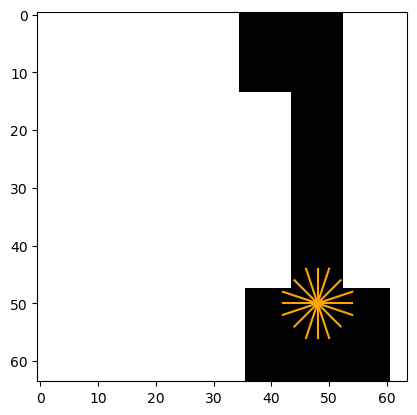

In [100]:
origin=path[index]
print('dispersion:',list_dispersion[index])
plt.imshow(img_map,cmap='gray')
plt.scatter(origin[0],origin[1])

x1=origin[0]
y1=origin[1]
for b in list_path_beams[index]:
    x2=b[1]
    y2=b[0]
#     print(x1,y1,x2,y2)
    plt.plot((x1,x2),(y1,y2),color='orange')

plt.show()


###  4) Characteristic dimension

In [101]:
def characteristic_dimension(path,img_map):
    
    scan_rays=8
    visibility=numpy.zeros((len(path),scan_rays))
    characteristic_dimension=numpy.zeros((len(path),int(scan_rays/2)))
    list_characteristic_dimension=[]
    visibility_index=[]
    path_index=[]
    minus_pair_index=[]
    item=0
    
    for mil in path:
        
        visibility_index=[]
        row=mil[1]
        column=mil[0]
        p1=(row,column)
        
        #1 start in 3 o'closk and continue counterclockwise
        counter=0
        while counter+column<=63:
            p2=(row,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1  
        v1=metric(p1,p2)
        visibility_index.append(p2)
        
        #2
        counter=0
        while counter+column<=63 and row-counter>=0:
            p2=(row-counter,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v2=metric(p1,p2)
        visibility_index.append(p2)
        
        #3
        counter=0
        while row-counter>=0:
            p2=(row-counter,column)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v3=metric(p1,p2)
        visibility_index.append(p2)

        #4
        counter=0
        while column-counter>=0 and row-counter>=0:
            p2=(row-counter,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v4=metric(p1,p2)
        visibility_index.append(p2)

        #5
        counter=0
        while column-counter>=0:
            p2=(row,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1  
        v5=metric(p1,p2)
        visibility_index.append(p2)
        
        #6
        counter=0
        while column-counter>=0 and row+counter<=63:
            p2=(row+counter,column-counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v6=metric(p1,p2)
        visibility_index.append(p2)
        
        #7
        counter=0
        while row+counter<=63:
            p2=(row+counter,column)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v7=metric(p1,p2)
        visibility_index.append(p2)

        #8
        counter=0
        while column+counter<=63 and row+counter<=63:
            p2=(row+counter,column+counter)
            if img_map[p2]==1.0:
                break
            else:
                counter+=1
        v8=metric(p1,p2)
        visibility_index.append(p2)
        
        visibility[item,0]=v1
        visibility[item,1]=v2
        visibility[item,2]=v3
        visibility[item,3]=v4
        visibility[item,4]=v5
        visibility[item,5]=v6
        visibility[item,6]=v7
        visibility[item,7]=v8

        characteristic_dimension[item,0]=v1+v5
        characteristic_dimension[item,1]=v2+v6
        characteristic_dimension[item,2]=v3+v7
        characteristic_dimension[item,3]=v4+v8
        
        #return the index for the minus pair
        min_pair=characteristic_dimension[item].argmin()
        if min_pair==0:
            index_pair=(visibility_index[0],visibility_index[4])
        elif min_pair==1:
            index_pair=(visibility_index[1],visibility_index[5])
        elif min_pair==2:
            index_pair=(visibility_index[2],visibility_index[6])
        elif min_pair==3:
            index_pair=(visibility_index[3],visibility_index[7])
        
        
        list_characteristic_dimension.append(min(characteristic_dimension[item]))
        item+=1
                
        path_index.append(visibility_index)
        minus_pair_index.append(index_pair)
        
        average_characteristic_dimension=sum(list_characteristic_dimension)/len(list_characteristic_dimension)
        
    return minus_pair_index, path_index, list_characteristic_dimension, average_characteristic_dimension

In [102]:
min_pair_index,path_index,lst_ch_dim,avg_ch_dim=characteristic_dimension(path[index:index+1],img_map)
print(min_pair_index)
print(path_index,type(path_index))
print(lst_ch_dim)
print(avg_ch_dim)

[((np.int32(45), np.int32(53)), (np.int32(63), np.int32(35)))]
[[(np.int32(50), np.int32(61)), (np.int32(45), np.int32(53)), (np.int32(0), np.int32(48)), (np.int32(45), np.int32(43)), (np.int32(50), np.int32(35)), (np.int32(63), np.int32(35)), (np.int32(63), np.int32(48)), (np.int32(63), np.int32(61))]] <class 'list'>
[np.float64(25.45584412271571)]
25.45584412271571


48 50 61 50
48 50 53 45
48 50 48 0
48 50 43 45
48 50 35 50
48 50 35 63
48 50 48 63
48 50 61 63


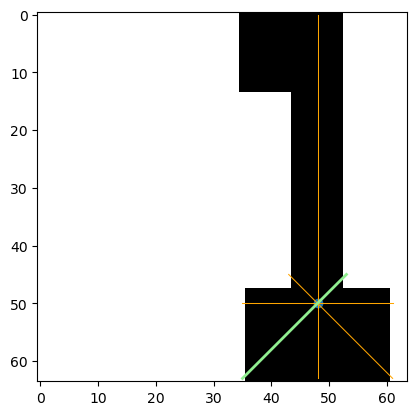

In [103]:
selection=index
origin=path[selection]

plt.imshow(img_map,cmap='gray')
plt.scatter(origin[0],origin[1])

x1=origin[0]
y1=origin[1]
for i in path_index[0]:
#     for i in p:
    x2=i[1]
    y2=i[0]
    print(x1,y1,x2,y2)
    plt.plot((x1,x2),(y1,y2),color='orange', linewidth=0.75)
    
plt.plot((min_pair_index[0][0][1],min_pair_index[0][1][1]),(min_pair_index[0][0][0],min_pair_index[0][1][0]),
         color='lightgreen',linewidth=2.0)   

plt.show()

### 5) Tortuosity

In [104]:
def tortuosity(path):
    '''The arc length is the length of the entire path\n
    the chord length is the length of a straight line between the
start and end points.\n\n Input: path'''
    
    start_point=path[0]
    end_point=path[len(path)-1]
    
    chord_lenght=metric(start_point,end_point)
    arc_lenght=lenght_path(path)
    tortuosity=chord_lenght/arc_lenght
    
    return start_point, end_point, tortuosity

In [105]:
start,end,arc=tortuosity(path)
print('start:',start, 'end:',end, 'arc:',arc)

start: [42 10] end: [42 61] arc: 0.7892367471834478


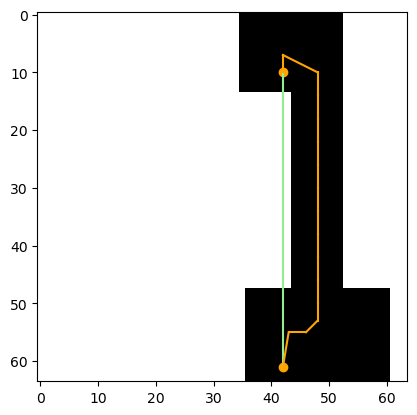

In [106]:
plt.imshow(img_map,cmap='gray')
plt.scatter(start[0],start[1],color='orange')
plt.scatter(end[0],end[1],color='orange')
plt.plot((start[0],end[0]),(start[1],end[1]), color='lightgreen')

p=0
while(p+1<len(path)):
    plt.plot((path[p][0],path[p+1][0]),(path[p][1],path[p+1][1]), color='orange')
    p+=1


plt.show()